In [18]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import requests
import json
import sys
sys.path.append('../bgc-analysis')
import numpy as np
from datetime import datetime
from calc_sensor import mcoms
from get_cal_sn import get_cal

In [19]:
SN = 1529 #Update for each float
root = '/Users/katttdaddyyyy/Library/CloudStorage/GoogleDrive-katherine.parise@whoi.edu'
filelocation = root + '/Shared drives/WHOI Argo/BGC/Float Tracking/' + 'pressure_test_results/' + 'combined_test_results/' + str(SN) + '_pressure_test_results' + ".xlsx"
df = pd.read_excel(filelocation)
display(df)

,Unnamed: 0,DATE,BUOYANCY_POSITION,ITERATION,HUMIDITY,PRES,TEMP,PSAL,O2_PHASE_DELAY,O2_TEMPERATURE_VOLTAGE,...,MCOMS2,MCOMS3,PH_VRS1,PH_VRS,PH_VK,PH_IK,PH_IB,PH_VIN,PH_VOUT,SN
0,0,2023-05-17 09:57:31.000,747,0,15.90,38.2,20.6287,32.531,23.609,0.630879,...,40450,306,-0.891387,-0.895005,-0.957960,-4.140000e-08,-1.970000e-08,7.05,7.06,1529
1,1,2023-05-17 09:58:55.000,699,1,15.85,37.3,20.6394,32.568,21.026,0.630662,...,39530,281,-0.894595,-0.894448,-0.957443,-4.200000e-08,-2.390000e-08,7.05,7.06,1529
2,2,2023-05-17 09:59:49.000,610,1,15.82,36.3,20.6480,32.565,20.390,0.630509,...,39290,289,-0.894736,-0.894670,-0.957802,-4.230000e-08,-2.520000e-08,7.05,7.06,1529
3,3,2023-05-17 10:00:44.000,610,1,15.72,35.9,20.6544,32.566,20.164,0.630361,...,38460,280,-0.894859,-0.894727,-0.958013,-4.150000e-08,-1.230000e-08,7.05,7.06,1529
4,4,2023-05-17 10:01:38.000,610,1,15.69,37.3,20.6619,32.566,20.074,0.630228,...,38130,316,-0.894982,-0.894858,-0.958161,-4.110000e-08,-1.530000e-08,7.05,7.06,1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1148,2023-05-18 11:50:00.357,221,2,15.62,543.3,20.4447,32.585,18.897,0.634652,...,36980,265,-0.906883,-0.906548,-1.003636,-4.220000e-08,-1.610000e-08,7.05,7.07,1529
1149,1149,2023-05-18 11:50:54.884,221,2,15.42,33.0,20.2943,32.588,18.807,0.637495,...,37280,260,-0.909473,-0.908959,-1.006906,-4.190000e-08,-1.390000e-08,7.05,7.07,1529
1150,1150,2023-05-18 11:51:49.355,221,2,15.29,197.4,20.3568,32.590,18.731,0.636144,...,37230,265,-0.907114,-0.906778,-1.004284,-4.090000e-08,-1.230000e-08,7.05,7.07,1529
1151,1151,2023-05-18 11:52:43.871,221,2,15.34,384.8,20.4361,32.590,18.723,0.634608,...,37160,264,-0.906373,-0.906388,-1.003741,-4.230000e-08,-2.340000e-08,7.05,7.07,1529


In [20]:
meta = get_cal(SN)
meta

,CTD_CNDC,CTD_PRES,CTD_TEMP,OPTODE_DOXY,TRANSISTOR_PH,FLUOROMETER_CDOM,FLUOROMETER_CHLA,BACKSCATTERINGMETER_BBP700,SPECTROPHOTOMETER_NITRATE
SENSOR_MAKER,SBE,DRUCK,SBE,SBE,SBE,WETLABS,WETLABS,WETLABS,SATLANTIC
SENSOR_MODEL,SBE41CP_V5.3.5,DRUCK_2900PSIA,SBE41CP_V5.3.5,SBE63_V3.2.2,SEAFET,MCOMS_FLBBCD,MCOMS_FLBBCD,MCOMS_FLBBCD,SUNA_V2
SENSOR_SERIAL_NO,18948,12263200,18948,3420,720-11809,420,420,420,2067
SENSOR_CALIB_DATE,2023-03-12,2023-03-16,2023-03-12,2023-03-08,2023-03-14,None,None,None,None
COMMENTS,None,None,None,None,REF SN: 11837; added calibration date; added K0,,,,None
PREDEPLOYMENT_CALIB_EQUATION,{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None},{'eq1': None}
PREDEPLOYMENT_CALIB_COEFFICIENT,"{'G': -1.013112, 'H': 0.1406985, 'I': -8.52096...","{'PA0': 0.4565495, 'PA1': 0.0003958692, 'PA2':...","{'TA0': -0.0008533736, 'TA1': 0.0002916516, 'T...","{'E': 0.011, 'A0': 1.0513, 'A1': -0.0015, 'A2'...","{'F0': -1.313704636889, 'F1': 1.807495921185e-...","{'DARK_CDOM': 50, 'SCALE_CDOM': 0.0378}","{'DARK_CHLA': 49, 'SCALE_CHLA': 0.002204}","{'KHI': 1.097, 'BETASW700': 'calculated at 124...","{'NO3': [0.00268251, 0.00071239, -0.00293074, ..."


In [21]:
# need different calibration coefficients for each one 
cal1  = meta["FLUOROMETER_CDOM"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal1

cal2 = meta["FLUOROMETER_CHLA"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal2
print(cal2)

cal3 = meta["BACKSCATTERINGMETER_BBP700"].PREDEPLOYMENT_CALIB_COEFFICIENT
cal3


{'DARK_CHLA': 49, 'SCALE_CHLA': 0.002204}


{'KHI': 1.097,
 'BETASW700': 'calculated at 124 angularDeg',
 'DARK_BACKSCATTERING700': 49,
 'SCALE_BACKSCATTERING700': 3.267e-07}

In [22]:
fcdom = mcoms(scale=(cal1["SCALE_CDOM"]),dark=(cal1["DARK_CDOM"]),counts=(df["MCOMS1"]))
fcdom 

fchla = mcoms(scale=(cal2["SCALE_CHLA"]),dark=(cal2["DARK_CHLA"]),counts=(df["MCOMS2"]))
fchla 

bbp = mcoms(scale=(cal3["SCALE_BACKSCATTERING700"]),dark=(cal3["DARK_BACKSCATTERING700"]),counts=(df["MCOMS3"]))
bbp

date = pd.to_datetime(df['DATE'])
#print(time)
#print(fcdom)
data = pd.concat([fcdom,fchla,bbp], axis=1)
data

display(fcdom.describe())
display(fchla.describe())
display(bbp.describe())



count    1153.000000
mean        0.931821
std         0.747581
min       -19.467000
25%         0.907200
50%         0.945000
75%         0.982800
max         7.862400
Name: MCOMS1, dtype: float64

count    1153.000000
mean       78.869945
std         1.303027
min        75.577364
25%        77.979724
50%        78.773164
75%        79.588644
max        89.043804
Name: MCOMS2, dtype: float64

count    1153.000000
mean        0.000072
std         0.000008
min        -0.000045
25%         0.000071
50%         0.000072
75%         0.000073
max         0.000204
Name: MCOMS3, dtype: float64

In [23]:
# Only need this chunk of code if there are extreme outliers based on summary stats above.

## Is there a way to "ignore" or "exlcude" outliers without changing the length of the array?
## Now that the array length is changed for fcdom, we can't plot all MCOMS on same figure.

#fcdom1 = []
#time = []
#pres = []
#for i, x in enumerate(fcdom):
    #if fcdom[i] < 2 and fcdom[i] > 0:
        #fcdom1.append(fcdom[i])
        #time.append(date[i])
        #pres.append(df['PRES'][i])

#display(len(fcdom1))

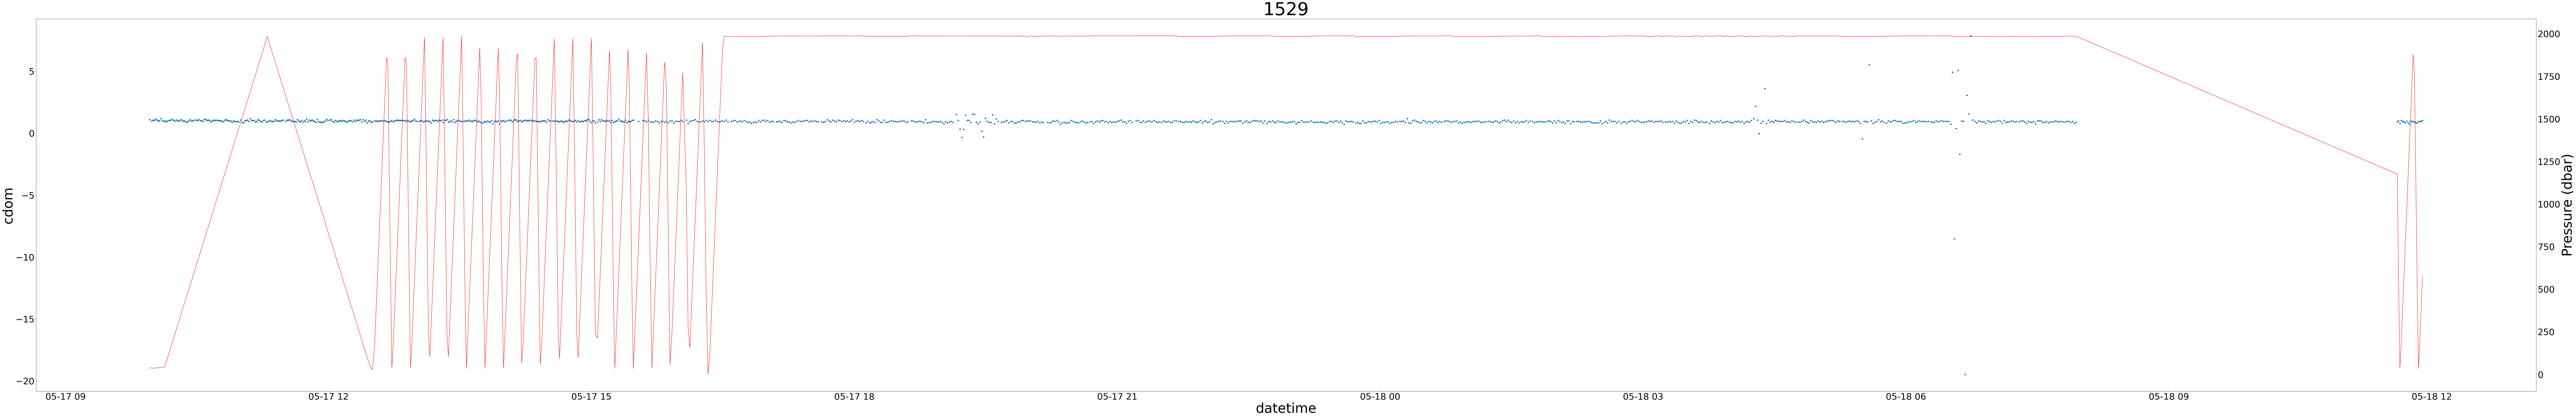

In [24]:
# plot for fcdom 

fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(date, fcdom) #Switch 'date' to 'time' if code chunk above is uncommented 
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('cdom', fontsize = 60) 
ax2 = ax.twinx()
ax2.plot(date, df['PRES'], color = 'red', linestyle = '-' ) #Switch 'date' and 'df['PRES'] if code chunk above is uncommented 
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)


(array([19494.375, 19494.5  , 19494.625, 19494.75 , 19494.875, 19495.   ,
        19495.125, 19495.25 , 19495.375, 19495.5  ]),
 [Text(19494.375, 0, '05-17 09'),
  Text(19494.5, 0, '05-17 12'),
  Text(19494.625, 0, '05-17 15'),
  Text(19494.75, 0, '05-17 18'),
  Text(19494.875, 0, '05-17 21'),
  Text(19495.0, 0, '05-18 00'),
  Text(19495.125, 0, '05-18 03'),
  Text(19495.25, 0, '05-18 06'),
  Text(19495.375, 0, '05-18 09'),
  Text(19495.5, 0, '05-18 12')])

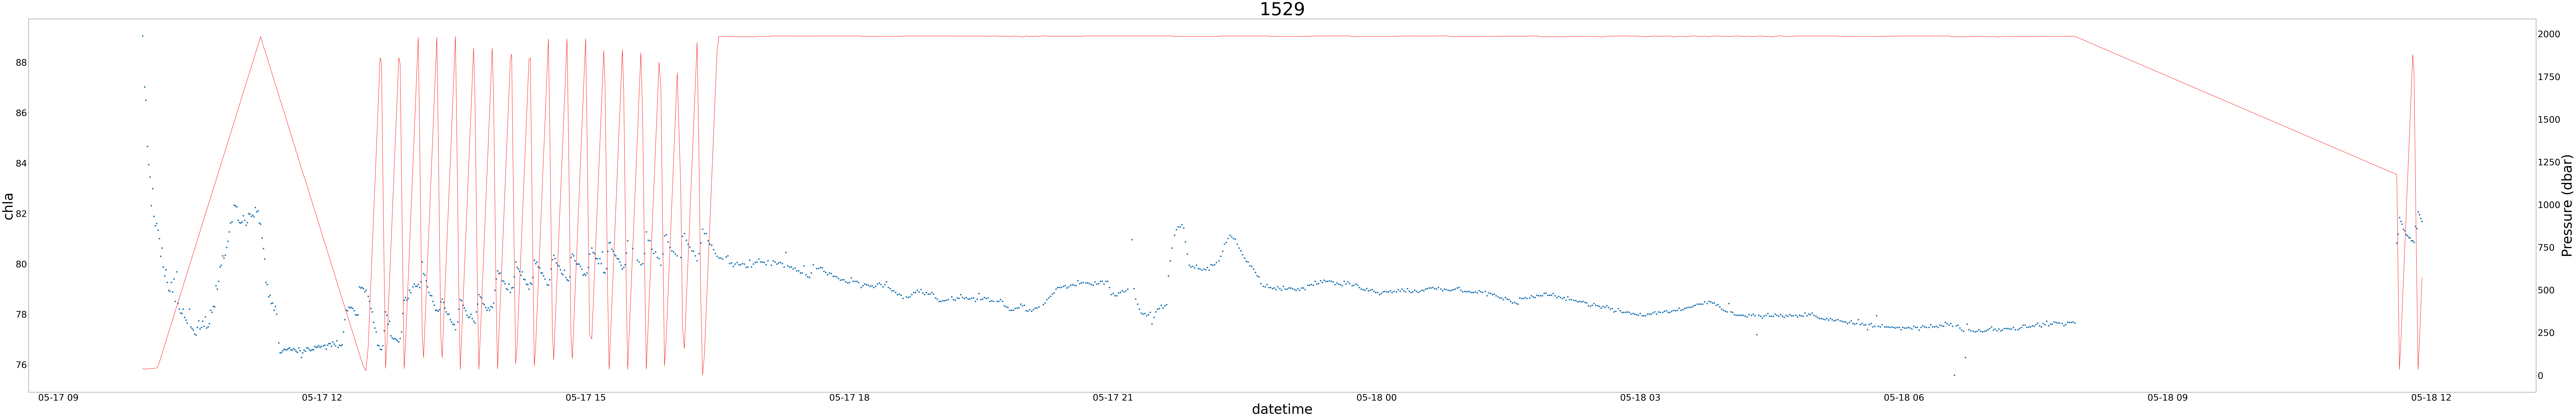

In [26]:
# plot for fchla

fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(date, fchla) 
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('chla', fontsize = 60)
ax2 = ax.twinx()
ax2.plot(date, df['PRES'], color = 'red', linestyle = '-' ) 
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)
plt.xticks(rotation =75)

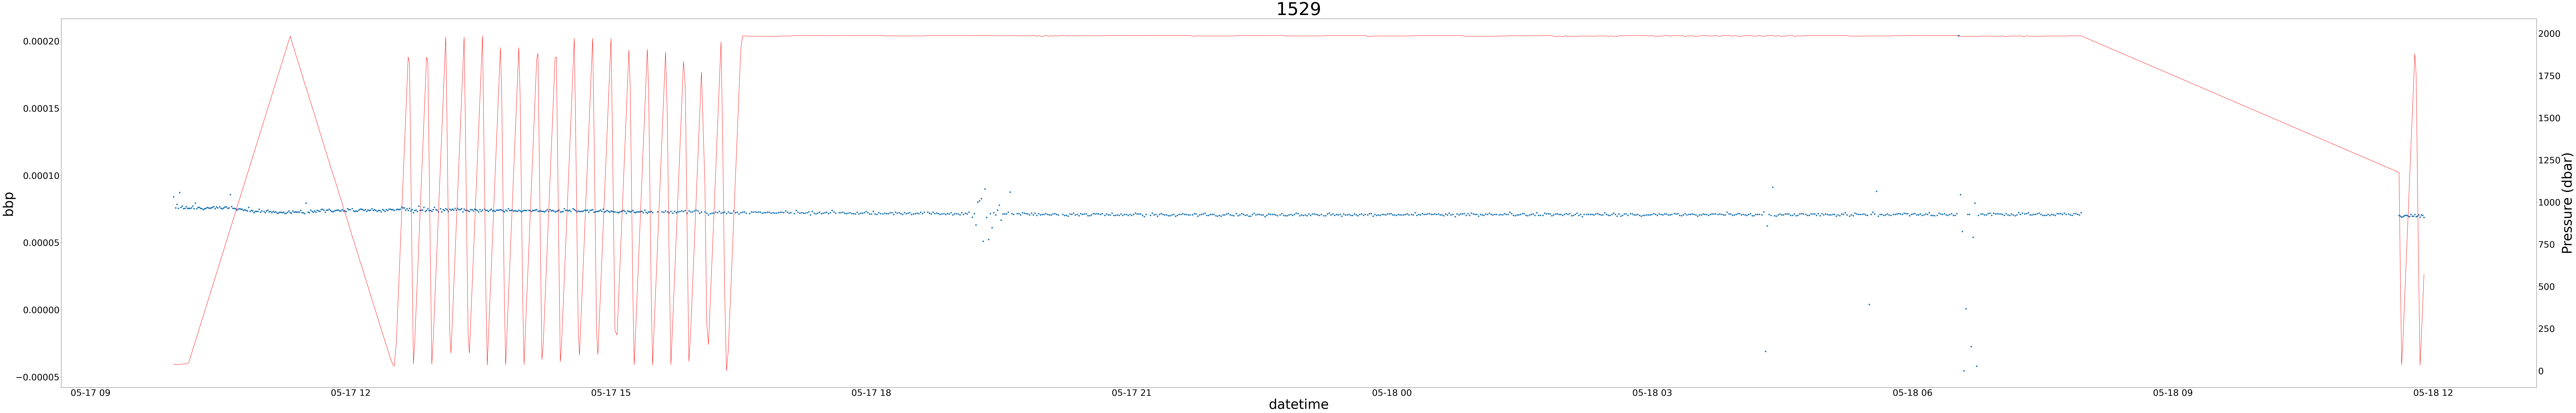

In [27]:
# plot for bbp

fig, ax = plt.subplots()
fig.set_size_inches(200, 30)
ax.plot_date(date, bbp) #Switch 'date' if code chunk above is uncommented 
ax.set_title(SN, fontsize = 80)
ax.set_xlabel('datetime', fontsize = 60)
ax.set_ylabel('bbp', fontsize = 60)
ax2 = ax.twinx()
ax2.plot(date, df['PRES'], color = 'red', linestyle = '-' )
ax2.set_ylabel('Pressure (dbar)', fontsize = 60)
ax.tick_params(axis= 'both', which = 'major', labelsize = 40)
ax2.tick_params(axis= 'both', which = 'major', labelsize = 40)